![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import re

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./kaggle/input\kaggle_task.csv
./kaggle/input\main_task.csv
./kaggle/input\sample_submission.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [280]:
DATA_DIR = './kaggle/input/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [188]:
df.sample(5)

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date
38078,id_1565,Vienna,"[European, Vegetarian Friendly, Austrian]",3,1566.0,$$ - $$$,3.0,/Restaurant_Review-g190454-d12437186-Reviews-I...,d12437186,1,5.0,2017-11-09
11971,id_4410,Milan,"[Italian, Mediterranean]",2,4413.0,$$$$,12.0,/Restaurant_Review-g187849-d10278746-Reviews-B...,d10278746,1,4.0,2016-07-16
30506,id_138,Hamburg,"[Indian, Asian, Vegetarian Friendly, Vegan Opt...",5,139.0,$$ - $$$,271.0,/Restaurant_Review-g187331-d1340597-Reviews-Ma...,d1340597,1,4.0,2017-12-17
27761,id_9260,Paris,"[Bar, Pub]",2,9262.0,$$ - $$$,12.0,/Restaurant_Review-g187147-d6929751-Reviews-Le...,d6929751,1,4.0,2018-01-08
4900,id_6651,Madrid,"[Asian, Vietnamese, Vegetarian Friendly, Vegan...",4,649.0,$$ - $$$,201.0,/Restaurant_Review-g187514-d7702830-Reviews-Vi...,d7702830,0,0.0,2017-10-16


In [15]:
df.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

In [16]:
# Выведем информацию о нашем датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### В нашем датасете 50,000 записей и 11 колонок, из которых 7 колонок содержат строковые данные и 4 - числовые

In [17]:
# Посмотрим, как выглядит наш датасет
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [18]:
# Посмотрим, сколько пропусков содержит каждая из колонок
df.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

In [19]:
# Переименуем столбцы для более удобного обращения к ним
df.columns = ['rest_id', 'city', 'cuisine', 'ranking', 'price', 'reviews_num', 'reviews', 'ta_url', 'ta_id', 'sample', 'rating']

In [20]:
# Выведем три верхних строчки для удобства
df.head(3)

,rest_id,city,cuisine,ranking,price,reviews_num,reviews,ta_url,ta_id,sample,rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0


In [21]:
# Создадим функцию для преобразования списка-строки в список

import ast

def string_to_list(line):
    return ast.literal_eval(line)

In [22]:
# Применим функцию к колонке cuisine
df['cuisine'] = df['cuisine'].apply(lambda line: string_to_list(line) if pd.notna(line) == True else line)

In [23]:
df.head()

,rest_id,city,cuisine,ranking,price,reviews_num,reviews,ta_url,ta_id,sample,rating
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [24]:
# Применим функцию к колонке reviews
df['reviews'] = df['reviews'].apply(lambda line: string_to_list(line))

ValueError: malformed node or string: nan

### Применим нашу функцию к каждой строке и выведем только строки с ошибкой

In [26]:
# Посмотрим в каких строках возникают проблемы
for i in range(len(df.reviews)):
    try:
        ast.literal_eval(df.reviews[i])
    except Exception:
        print(i)

8168
9608
15315
32958


In [27]:
# Так как строк всего 4, выведем их на экран и проанализируем
print(df.reviews[8168])
print(df.reviews[9608])
print(df.reviews[15315])
print(df.reviews[32958])

nan
nan
[['Will certainly be back', nan], ['11/26/2017', '07/27/2017']]
[[nan, 'Good food with decent service'], ['11/21/2017', '07/21/2017']]


### А вот и ответ на вопрос, почему метод конверсии строки в список выводился с ошибкой. Во вложенном списке присутствуют значения nan.

### Повторим нашу конверсию из строки-списка в список, но уже перед этим заменим 'nan' на ' '

In [28]:
# Уберем 'nan' и снова применим функцию к колонке reviews
df['reviews'] = df['reviews'].apply(lambda line: str(line).replace('nan', "''"))
df['reviews'] = df['reviews'].apply(lambda line: string_to_list(line) if '[' in line else line)

In [29]:
# Добавим к первоначальному датафрейму df колонку с количеством кухонь
# Поменяем порядок колонок, чтобы колонка с числом кухонь была после 'cuisine'
df['number_of_cuisines'] = df['cuisine'].apply(lambda x: len(x) if pd.notna([x]).any() == True else x)
df = df[['rest_id', 'city', 'cuisine', 'number_of_cuisines', 'ranking', 'price', 'reviews_num', 'reviews', 'ta_url', 'ta_id', 'sample', 'rating']]
df.head()

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,reviews,ta_url,ta_id,sample,rating
0,id_0,Paris,"[Bar, Pub]",2.0,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",5.0,106.0,$$ - $$$,97.0,"[[Very good reviews!, Fine dining in Hakaniemi...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,[Vegetarian Friendly],1.0,810.0,$$ - $$$,28.0,"[[Better than the Links, Ivy Black], [12/28/20...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",5.0,1669.0,$$$$,202.0,"[[Most exquisite, Delicious and authentic], [1...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",6.0,37.0,$$$$,162.0,"[[Always the best in bratislava, Very good but...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [30]:
# Создадим датафрейм с уникальными городами и средним количеством представленных кухонь на ресторан
city_num_cuisines = df[['city', 'number_of_cuisines']][df['number_of_cuisines'].isna() == False].groupby(['city']).mean().round().reset_index()
city_num_cuisines['number_of_cuisines'] = city_num_cuisines['number_of_cuisines'].astype('int')
city_num_cuisines

,city,number_of_cuisines
0,Amsterdam,4
1,Athens,3
2,Barcelona,3
3,Berlin,3
4,Bratislava,3
5,Brussels,3
6,Budapest,4
7,Copenhagen,3
8,Dublin,4
9,Edinburgh,4


In [31]:
# Создадим новый датафейм с перечислением каждой кухни в отдельной строке
city_cuisine = df[['city', 'cuisine']].explode('cuisine').sort_values(by=['city', 'cuisine']).reset_index()
city_cuisine.drop('index', axis=1, inplace=True)
city_cuisine['qty'] = 1

In [32]:
# Сгруппируем данные по городам и кухням и выведем сумму по вхождению каждой кухни в город
# Отсортируем значение по городу и количеству кухонь по убыванию
city_cuisine = city_cuisine.groupby(['city', 'cuisine']).sum().reset_index()
city_cuisine = city_cuisine.sort_values(by=['city', 'qty'], ascending=[True, False])

city_cuisine

,city,cuisine,qty
26,Amsterdam,European,618
82,Amsterdam,Vegetarian Friendly,587
23,Amsterdam,Dutch,358
7,Amsterdam,Bar,236
81,Amsterdam,Vegan Options,232
...,...,...,...
2332,Zurich,Nepali,1
2334,Zurich,Persian,1
2336,Zurich,Portuguese,1
2339,Zurich,Singaporean,1


In [33]:
# Создадим список порядковых номеров кухонь в каждом городе
order = []
for i in city_num_cuisines.city:
    for j in range(0, len(city_cuisine[city_cuisine.city == i])):
        order.append(j)

In [34]:
# Создадим новую колонку в дадафрейме с этим списком
city_cuisine['order'] = order

In [35]:
# Сгруппируем данные по кухнням и через сумму выведем частоту повторений кухни в данных
city_cuisine.head(10)
city_cuisine[['cuisine', 'qty']].groupby(['cuisine']).sum().sort_values(by='qty', ascending=False)

,qty
cuisine,
Vegetarian Friendly,14021
European,12561
Mediterranean,7820
Italian,7433
Vegan Options,5684
...,...
Yunnan,2
Burmese,1
Latvian,1


In [36]:
# Создадим датафрейм cuisine_df с уникальными городами.
# Привяжем к ним наиболее популярные кухни в среднем количестве их представленности в данном городе

cuisine_df = pd.DataFrame()
city_list = []
cuisine_list = []
for i in range(len(city_num_cuisines)):
    city_list.append(city_cuisine[(city_cuisine.city == city_num_cuisines.city[i]) & (city_cuisine.order <= city_num_cuisines.number_of_cuisines[i]-1)].city.to_list()[0])
    cuisine_list.append(city_cuisine[(city_cuisine.city == city_num_cuisines.city[i]) & (city_cuisine.order <= city_num_cuisines.number_of_cuisines[i]-1)].cuisine.to_list())
    cuisine_df = pd.DataFrame(list(zip(city_list, cuisine_list)), columns=['city', 'cuisine'])
    cuisine_df.drop_duplicates(subset=['city'], inplace=True)

In [37]:
cuisine_df

,city,cuisine
0,Amsterdam,"[European, Vegetarian Friendly, Dutch, Bar]"
1,Athens,"[Greek, Mediterranean, Vegetarian Friendly]"
2,Barcelona,"[Spanish, Mediterranean, Vegetarian Friendly]"
3,Berlin,"[Vegetarian Friendly, European, Italian]"
4,Bratislava,"[European, Central European, Pub]"
5,Brussels,"[European, Belgian, Vegetarian Friendly]"
6,Budapest,"[European, Hungarian, Vegetarian Friendly, Cen..."
7,Copenhagen,"[European, Vegetarian Friendly, Danish]"
8,Dublin,"[Vegetarian Friendly, European, Irish, Gluten ..."
9,Edinburgh,"[Vegetarian Friendly, British, Gluten Free Opt..."


### Отлично! Теперь заполним пустые ячейки в главном датафрейме df в колонке cuisine в соответствие с датафреймом cusine_df

In [38]:
# На основе df создадим cuisine_na с nan строками
# И добавим к нему полученные данные из cuisine_df
# Удалим пустую колонку cuisine, оставив заполненную
# Заменим порядок колонок на привычный

cuisine_na = pd.merge(df[df.cuisine.isna()], cuisine_df, on='city')
cuisine_na.drop(['cuisine_x'], axis=1, inplace=True)
cuisine_na = cuisine_na[['rest_id', 'city', 'cuisine_y', 'number_of_cuisines', 'ranking', 'price', 'reviews_num', 'reviews', 'ta_url', 'ta_id', 'sample', 'rating']]
cuisine_na.columns = ['rest_id', 'city', 'cuisine', 'number_of_cuisines', 'ranking', 'price', 'reviews_num', 'reviews', 'ta_url', 'ta_id', 'sample', 'rating']
df = df.append(cuisine_na, ignore_index=True)

In [39]:
# Уберем из основного датарфейма строки с пустыми 
df = df[~df.cuisine.isna()]

In [40]:
# Обновим данные в колонке 'number_of_cuisines' после замены 'nan' в 'cuisine'
df['number_of_cuisines'] = df['cuisine'].apply(lambda x: len(x))
df

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,reviews,ta_url,ta_id,sample,rating
0,id_0,Paris,"[Bar, Pub]",2,12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",5,106.0,$$ - $$$,97.0,"[[Very good reviews!, Fine dining in Hakaniemi...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,[Vegetarian Friendly],1,810.0,$$ - $$$,28.0,"[[Better than the Links, Ivy Black], [12/28/20...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",5,1669.0,$$$$,202.0,"[[Most exquisite, Delicious and authentic], [1...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",6,37.0,$$$$,162.0,"[[Always the best in bratislava, Very good but...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61585,id_199,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,200.0,NaN,5.0,"[[Delicious cakes!, This is IT], [12/31/2017, ...",/Restaurant_Review-g274873-d10228853-Reviews-S...,d10228853,1,5.0
61586,id_256,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,257.0,NaN,NaN,"[[Great dishes at Dishi], [02/08/2016]]",/Restaurant_Review-g274873-d9823373-Reviews-Di...,d9823373,1,5.0
61587,id_400,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,401.0,NaN,35.0,[[Lovely intimate restaurant in a quiet part.....,/Restaurant_Review-g274873-d3355887-Reviews-Ba...,d3355887,1,3.5
61588,id_347,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,348.0,NaN,10.0,"[[By the river, Unique experience!], [08/18/20...",/Restaurant_Review-g274873-d11924327-Reviews-K...,d11924327,1,4.0


In [41]:
# Посмотрим на значения 'price'
df.price.unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [ ]:
# Напишем цикл для создания датафрейма с наиболее часто встречающимися ценами
# (не стал применять, долгий и ненужный)

# price_list = []
# city_list1 = list(df.city.unique())
# rank_list = []
# for i in city_list1:
#     rank_df = df[df.city == i]['ranking'].value_counts(bins=4).reset_index()
#     rank_list.append([[round(x.left, 2), round(x.right, 2)] for x in rank_df['index']])
#     price_df = pd.DataFrame(list(zip(city_list1, rank_list)), columns=['city', 'rank_range'])

    
# for a in range(len(price_df)):
#     for b in range(len(df)):
#         if price_df.city[a] == df.city[b]:
#             for k in price_df.rank_range[a]:
#                 prc = df[(df.city == df.city[b]) & (df.ranking >= k[0]) & (df.ranking < k[1])]['price'].value_counts().index[0]
#                 price_list.append(prc)
#         else:
#             continue
#     price_df = pd.DataFrame(list(zip(city_list1, rank_list, price_list)), columns=['city', 'rank_range', 'price_list'])

### Оказывается, наиболее популярные цены - это "SS-SSS"

In [42]:
# Применим эту цену ко всем нашим 'nan'

df.loc[df.price.isna(), ['price']] = '$$ - $$$'

In [43]:
# Создадим датафрейм с уникальными названиями городов и средним количеством отзывов на ресторан в данном городе
# Отзывы будем брать только у ресторанов с рейтингом до среднего в данном городе

city_num_reviews = df[['city', 'reviews_num']][(df['reviews_num'].isna() == False)]
city_num_reviews = city_num_reviews.groupby(['city']).mean().round().reset_index()

In [44]:
# Заменим 'nan' в колонке с количеством отзывов в основном датафрейме на получившиеся средние

rev_num_na = pd.merge(df[df.reviews_num.isna()], city_num_reviews, on='city', how='left')
rev_num_na.drop(['reviews_num_x'], axis=1, inplace=True)
rev_num_na = rev_num_na[['rest_id', 'city', 'cuisine', 'number_of_cuisines', 'ranking', 'price', 'reviews_num_y', 'reviews', 'ta_url', 'ta_id', 'sample', 'rating']]
rev_num_na.columns = ['rest_id', 'city', 'cuisine', 'number_of_cuisines', 'ranking', 'price', 'reviews_num', 'reviews', 'ta_url', 'ta_id', 'sample', 'rating']
df = df.append(rev_num_na, ignore_index=True)

In [45]:
# Уберем из основного датафрейма строки с nan в review_num
df = df[~df.reviews_num.isna()]

In [ ]:
# Почему не работает - не понятно
# patter = re.compile('\w{2}\/\w{2}\/\w{4}')
# '12/06/2017' == pattern

In [46]:
# Создадим датафрейм с ta_id ресторана и последней датой отзыва в формате datetime
# Склеим основной и новый датафреймы с помощью merge

df_revdate = df[['ta_id','reviews']].explode('reviews').iloc[1::2]
df_revdate = df_revdate.explode('reviews').reset_index(drop=True)
df_revdate.dropna(subset=['reviews'], axis=0, how='any', inplace=True)
df_revdate.reset_index(drop=True, inplace=True)

# Уберем не похожие на дату строки через map и len
df_revdate = df_revdate[~(df_revdate.reviews.map(len)<10)]
df_revdate = df_revdate[~(df_revdate.reviews.map(len)>10)]
df_revdate = df_revdate[df_revdate.reviews.str.contains(r'/')]

df_revdate['reviews'] = df_revdate['reviews'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').date())
df_revdate.sort_values(['ta_id','reviews'], ascending=False, inplace=True)

df_revdate.drop_duplicates(subset=['ta_id'], keep='first', inplace=True)
df_revdate.sort_index(inplace=True)
df_revdate.rename(columns={"reviews": "last_review_date"}, inplace=True)
df_revdate

df = pd.merge(df, df_revdate, on='ta_id', how='left')

df.drop(['reviews'], axis=1, inplace=True)

In [47]:
# Посмотрим, что получилось
df

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date
0,id_0,Paris,"[Bar, Pub]",2,12963.0,$$ - $$$,4.0,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,NaN
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",5,106.0,$$ - $$$,97.0,/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2017-12-05
2,id_2,Edinburgh,[Vegetarian Friendly],1,810.0,$$ - $$$,28.0,/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2017-12-28
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",5,1669.0,$$$$,202.0,/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2017-12-06
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",6,37.0,$$$$,162.0,/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,2018-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_255,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,256.0,$$ - $$$,88.0,/Restaurant_Review-g274873-d11729216-Reviews-G...,d11729216,1,5.0,2017-05-05
49996,id_369,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,370.0,$$ - $$$,88.0,/Restaurant_Review-g274873-d783229-Reviews-Hal...,d783229,1,4.0,2014-03-11
49997,id_274,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,275.0,$$ - $$$,88.0,/Restaurant_Review-g274873-d10673098-Reviews-M...,d10673098,1,5.0,2016-07-29
49998,id_380,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,381.0,$$ - $$$,88.0,/Restaurant_Review-g274873-d10194262-Reviews-O...,d10194262,1,4.0,NaN


In [48]:
# Добавим nan с last_review_date в список
# Заполним его наиболее часто встречающейся датой отзыва для каждого соответствующего города
na_list = df.last_review_date[df.last_review_date.isna()].index.to_list()

mode_list = []
# city_list = []
for i in na_list:
#     city_list.append(df.city[i])
    mode_list.append(df['last_review_date'][(df.city == df.city[i]) & (df.last_review_date.isna() == False)].mode()[0])

In [49]:
# Создадим датафрейм с индексом строки, где указан nan в last_review_date и новыми значениями
na_lrdate = pd.DataFrame(list(zip(na_list, mode_list)), columns=['row_num', 'last_review_date'])
na_lrdate

,row_num,last_review_date
0,0,2018-01-07
1,6,2018-02-24
2,34,2018-01-07
3,40,2018-01-06
4,43,2018-01-07
...,...,...
10383,49990,2017-12-22
10384,49991,2017-12-22
10385,49992,2017-12-22
10386,49993,2018-01-07


In [50]:
# Добавим в него данные всех колонок из датафрейма в том же формате и порядке
df_na = df[df.index.isin(na_lrdate.row_num)].reset_index(drop=True).merge(na_lrdate, left_on=df[df.index.isin(na_lrdate.row_num)].reset_index(drop=True).index, right_on=na_lrdate.index)
df_na.drop(columns=['key_0','last_review_date_x','row_num'], axis=1, inplace=True)
df_na.rename(columns={'last_review_date_y': 'last_review_date'}, inplace=True)

In [51]:
# Уберем из старого датафрейма все строки с пустыми last_review_date
# Составим новый датафрейм из основного df и df_na
# Проверим количество пустых значений в новом

df = df[~df.last_review_date.isna()]
new_df = pd.concat([df, df_na]).reset_index(drop=True)
new_df.isna().sum()

rest_id               0
city                  0
cuisine               0
number_of_cuisines    0
ranking               0
price                 0
reviews_num           0
ta_url                0
ta_id                 0
sample                0
rating                0
last_review_date      0
dtype: int64

In [53]:
new_df

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date
0,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",5,106.0,$$ - $$$,97.0,/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2017-12-05
1,id_2,Edinburgh,[Vegetarian Friendly],1,810.0,$$ - $$$,28.0,/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2017-12-28
2,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",5,1669.0,$$$$,202.0,/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2017-12-06
3,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",6,37.0,$$$$,162.0,/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,2018-02-08
4,id_5,Paris,"[French, Cafe, Fast Food]",3,5093.0,$,24.0,/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_482,Luxembourg,"[European, Vegetarian Friendly, French]",3,482.0,$$ - $$$,83.0,/Restaurant_Review-g190356-d13137452-Reviews-C...,d13137452,1,4.0,2017-12-22
49996,id_477,Luxembourg,"[European, Vegetarian Friendly, French]",3,477.0,$$ - $$$,83.0,/Restaurant_Review-g190356-d12091192-Reviews-L...,d12091192,1,4.0,2017-12-22
49997,id_568,Luxembourg,"[European, Vegetarian Friendly, French]",3,569.0,$$ - $$$,83.0,/Restaurant_Review-g190356-d743851-Reviews-Exi...,d743851,1,3.0,2017-12-22
49998,id_373,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,374.0,$$ - $$$,88.0,/Restaurant_Review-g274873-d8602510-Reviews-To...,d8602510,1,4.0,2018-01-07


In [54]:
# round((datetime.today().date() - datetime.strptime('02-04-1989', '%m-%d-%Y').date()).days/365,1)

In [55]:
# Создадим список со всеми URL адресами в датафрейме
url_list = new_df.ta_url.to_list()

In [56]:
# Создадим тестовый список из 5 адресов
url_test = url_list[0:100]

In [57]:
# pip install requests-futures

In [58]:
# Выгрузим все координаты ресторанов со страниц tripadvisor.com
# Поместим их в словарь с привязкой к уникальному ta_url

import requests
import re
import time
import concurrent.futures

crds = {}

t1 = time.perf_counter()

def rtrv_crds(url):
    
    data = requests.get('http://www.tripadvisor.com{}'.format(url)).text
    crds[url] = re.findall('\"latitude\"\:\"(-?\d+\.\d+)\",\"longitude\"\:\"(-?\d+\.\d+)\"', data)
    
    return crds


with concurrent.futures.ThreadPoolExecutor(max_workers=60) as executor:
    executor.map(rtrv_crds, url_list)
    

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')
# print(crds)

Finished in 1955.7384432 seconds


In [60]:
len(crds)

49955

In [61]:
# Посмотрим на спиок
crds

{'/Restaurant_Review-g187849-d3532770-Reviews-Nabab-Milan_Lombardy.html': [('45.4591',
   '9.17105')],
 '/Restaurant_Review-g187849-d7209625-Reviews-M_ama_Milano-Milan_Lombardy.html': [('45.47325',
   '9.21391')],
 '/Restaurant_Review-g187147-d1336377-Reviews-La_Baraque-Paris_Ile_de_France.html': [('48.854485',
   '2.384318')],
 '/Restaurant_Review-g274707-d1093021-Reviews-U_Zlateho_Lva-Prague_Bohemia.html': [('50.08709',
   '14.425313')],
 '/Restaurant_Review-g187147-d12921076-Reviews-Be_BoBun-Paris_Ile_de_France.html': [('48.85942',
   '2.36831')],
 '/Restaurant_Review-g187309-d958943-Reviews-Wrossis-Munich_Upper_Bavaria_Bavaria.html': [('48.214138',
   '11.539469')],
 '/Restaurant_Review-g187791-d2061134-Reviews-La_Balestra-Rome_Lazio.html': [('41.91782',
   '12.497599')],
 '/Restaurant_Review-g187497-d10133841-Reviews-Balabar-Barcelona_Catalonia.html': [('41.40504',
   '2.170511')],
 '/Restaurant_Review-g186338-d1018463-Reviews-Souk_Bazaar-London_England.html': [('51.514183',
   '-

In [62]:
# import pandas as pd
# Создадим датафрейм из нашего словаря

crds_df = pd.DataFrame.from_dict(crds, orient='index')

crds_df['ta_url'] = crds_df.index

crds_df = crds_df.rename(columns={0: 'coords'})

crds_df.reset_index(drop=True, inplace=True)

len(crds_df[crds_df.coords.isna()]) # Проверим сколько у нас получилось пустых координат

# crds_df.to_csv('crds_df.csv', index=False, mode='w')

6142

In [63]:
# Создадим новый датафрейм соединив первоначальный с координатами
new_df = pd.merge(new_df, crds_df, on='ta_url', how='left')
new_df

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date,coords
0,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",5,106.0,$$ - $$$,97.0,/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2017-12-05,"(60.18211, 24.950169)"
1,id_2,Edinburgh,[Vegetarian Friendly],1,810.0,$$ - $$$,28.0,/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2017-12-28,"(55.937523, -3.203025)"
2,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",5,1669.0,$$$$,202.0,/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2017-12-06,"(51.49698, -0.126547)"
3,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",6,37.0,$$$$,162.0,/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,2018-02-08,"(48.141064, 17.091099)"
4,id_5,Paris,"[French, Cafe, Fast Food]",3,5093.0,$,24.0,/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,2017-09-07,"(48.861046, 2.33591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_482,Luxembourg,"[European, Vegetarian Friendly, French]",3,482.0,$$ - $$$,83.0,/Restaurant_Review-g190356-d13137452-Reviews-C...,d13137452,1,4.0,2017-12-22,None
49996,id_477,Luxembourg,"[European, Vegetarian Friendly, French]",3,477.0,$$ - $$$,83.0,/Restaurant_Review-g190356-d12091192-Reviews-L...,d12091192,1,4.0,2017-12-22,"(49.60773, 6.12292)"
49997,id_568,Luxembourg,"[European, Vegetarian Friendly, French]",3,569.0,$$ - $$$,83.0,/Restaurant_Review-g190356-d743851-Reviews-Exi...,d743851,1,3.0,2017-12-22,"(49.60472, 6.13248)"
49998,id_373,Ljubljana,"[European, Slovenian, Vegetarian Friendly, Cen...",4,374.0,$$ - $$$,88.0,/Restaurant_Review-g274873-d8602510-Reviews-To...,d8602510,1,4.0,2018-01-07,"(46.04311, 14.50351)"


In [65]:
new_df.isna().sum()

rest_id                  0
city                     0
cuisine                  0
number_of_cuisines       0
ranking                  0
price                    0
reviews_num              0
ta_url                   0
ta_id                    0
sample                   0
rating                   0
last_review_date         0
coords                6153
dtype: int64

In [66]:
# Установим библиотеку opencage для поиска координат центра города по названию
!pip install opencage

In [67]:
# Импортируем библиотеку OpenCageGeocode для доступа к API
from opencage.geocoder import OpenCageGeocode

In [68]:
# на оф.сайте opencagedata.com запросим бесплатный API key
# 2476a2a1ca91420fa57cc3962d6dc8c4
# Выгрузим данные и создадим датафрейм с городами и их координатами

city_coords = []

key = '2476a2a1ca91420fa57cc3962d6dc8c4'  
geocoder = OpenCageGeocode(key)

for query in city_list:
    results = geocoder.geocode(query)
    city_coords.append([results[0]['geometry']['lat'], results[0]['geometry']['lng']])
# query = 'Bijuesca, Spain'  
# results = geocoder.geocode(query)
# results[0]['geometry']['lat']

In [69]:
# Создаем датафрейм
coords = pd.DataFrame(list(zip(city_list, city_coords)), columns=['city', 'city_coords'])

In [70]:
# Добавим новые данные в основной датафрейм
new_df = pd.merge(new_df, coords, on='city', how='left')

In [71]:
# Помеяняем тип элемента в списках в coords на float
new_df.coords = new_df.coords.apply(lambda x: (float(x[0]), float(x[1])) if pd.isna([x]).any() == False else x)

In [72]:
# Поменяем тип данных в колонке city_coords на tuple
new_df.city_coords = new_df.city_coords.apply(lambda x: tuple(x))

In [77]:
# Установим библиотеку haversine для определения расстояния между гео координатами
!pip install haversine

In [78]:
# С помощью библиотеки haversine определим расстояние до центра города

from haversine import haversine

new_df['km_from_center'] = ''

for i in range(len(new_df)):
    if pd.isna(new_df.coords[i]) == False:
        new_df['km_from_center'][i] = haversine(new_df.city_coords[i], new_df.coords[i])
    else:
        continue

# lyon = (45.7597, 4.8422)
# paris = (48.8567, 2.3508)

# haversine(lyon, paris)



<ipython-input-78-5e0251bfb8ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['km_from_center'][i] = haversine(new_df.city_coords[i], new_df.coords[i])


In [79]:
# Создадим датафрейм с уникальными названиями городов и средним расстоянием от ресторана до центра города

city_km = new_df[['city', 'km_from_center']][new_df['km_from_center'] != '']
city_km.km_from_center = pd.to_numeric(city_km.km_from_center)
city_km = city_km.groupby(['city'])['km_from_center'].mean().round(3).reset_index()

# Заменим '' в колонке km_to_center основном датафрейме new_df на получившиеся средние

for i in range(len(city_km)):
    for j in range(len(new_df)):
        if city_km.city[i] == new_df.city[j] and new_df.km_from_center[j] == '':
            new_df.km_from_center[j] = city_km.km_from_center[i]
        else:
            continue

<ipython-input-79-01bd46bfe876>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.km_from_center[j] = city_km.km_from_center[i]


In [80]:
# new_df.last_review_date[0]

In [81]:
# Посчитаем количесвто дней с последнего отзыва до текущего дня
new_df['days_from_last_review'] = int
for i in range(len(new_df)):
    new_df['days_from_last_review'][i] = (datetime.today().date() - new_df['last_review_date'][i]).days

<ipython-input-81-385f33e36f00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['days_from_last_review'][i] = (datetime.today().date() - new_df['last_review_date'][i]).days


In [82]:
new_df.head()

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date,coords,city_coords,km_from_center,days_from_last_review
0,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",5,106.0,$$ - $$$,97.0,/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2017-12-05,"(60.18211, 24.950169)","(60.1674881, 24.9427473)",1.67689,1223
1,id_2,Edinburgh,[Vegetarian Friendly],1,810.0,$$ - $$$,28.0,/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2017-12-28,"(55.937523, -3.203025)","(55.9533456, -3.1883749)",1.98182,1200
2,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",5,1669.0,$$$$,202.0,/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2017-12-06,"(51.49698, -0.126547)","(51.5073219, -0.1276474)",1.15249,1222
3,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",6,37.0,$$$$,162.0,/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,2018-02-08,"(48.141064, 17.091099)","(48.1516988, 17.1093063)",1.79532,1158
4,id_5,Paris,"[French, Cafe, Fast Food]",3,5093.0,$,24.0,/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,2017-09-07,"(48.861046, 2.33591)","(48.8566969, 2.3514616)",1.23622,1312


### Попробуйем применить алгоритм семантического анализа к нашему последнему оставленному отзыву и добавим новые показатели к нашему новому датафрейму

In [83]:
# Добавим в наш новый датафрейм ранее удаленную строку с последними отзывами

df_lreview = pd.read_csv('main_task.csv')[['Reviews', 'ID_TA']]

df_lreview.columns = ['lreview', 'ta_id']

# Создадим функцию для преобразования списка-строки в список

import ast

def string_to_list(line):
    return ast.literal_eval(line)

# Уберем 'nan' и применим функцию к колонке lreview

df_lreview['lreview'] = df_lreview['lreview'].apply(lambda line: line.replace(str(np.nan), str("''")))

df_lreview['lreview'] = df_lreview['lreview'].apply(lambda line: string_to_list(line))

df_lreview = df_lreview.explode('lreview').iloc[0::2].reset_index()

df_lreview.drop('index', axis=1, inplace=True)

In [84]:
# Оставим в нашем датафрейме только последний отзыв

for i in range(len(df_lreview)):
    if str(df_lreview.lreview[i]) != '[]':
        df_lreview['lreview'][i]= df_lreview['lreview'][i][0]
    else:
        continue

In [95]:
# Уберем из датафрейма строки с пустыми списками
df_lreview.drop(df_lreview[df_lreview.lreview.astype(str) == '[]'].index, inplace=True)

In [85]:
# Склеим датафрейм с новым
new_df = pd.merge(new_df, df_lreview, on='ta_id', how='left')

In [86]:
new_df.isna().sum()

rest_id                     0
city                        0
cuisine                     0
number_of_cuisines          0
ranking                     0
price                       0
reviews_num                 0
ta_url                      0
ta_id                       0
sample                      0
rating                      0
last_review_date            0
coords                   6157
city_coords                 0
km_from_center              0
days_from_last_review       0
lreview                  9983
dtype: int64

In [108]:
new_df[new_df.lreview.astype(str).map(len)>3]

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date,coords,city_coords,km_from_center,days_from_last_review,lreview
761,id_1171,Madrid,"[Indian, Asian, Nepali, Vegetarian Friendly]",4,1219.0,$$ - $$$,22.0,/Restaurant_Review-g187514-d12488993-Reviews-K...,d12488993,0,0.0,2018-01-07,"(40.474327, -3.578726)","(40.4167047, -3.7035825)",12.3566,1190,"Fantastic food, Excellent service"
939,id_1423,Madrid,"[Chinese, Japanese, Sushi, Asian, Thai, Vietna...",8,1220.0,$$ - $$$,159.0,/Restaurant_Review-g187514-d2010743-Reviews-Re...,d2010743,0,0.0,2016-12-25,"(40.450787, -3.696787)","(40.4167047, -3.7035825)",3.83318,1568,"Excellent cuisine, friendly and helpful se..."
1774,id_2654,Madrid,"[Chinese, Japanese, Asian]",3,3146.0,$$ - $$$,53.0,/Restaurant_Review-g187514-d4914988-Reviews-Xi...,d4914988,0,0.0,2016-09-07,"(40.45306, -3.66502)","(40.4167047, -3.7035825)",5.19559,1677,Excellent food food
2806,id_4209,Madrid,"[Japanese, Sushi, Asian, Thai]",4,3270.0,$$ - $$$,77.0,/Restaurant_Review-g187514-d2360290-Reviews-Lo...,d2360290,0,0.0,2017-10-16,"(40.40262, -3.70997)","(40.4167047, -3.7035825)",1.65689,1273,Great Asian Option
2879,id_4323,Warsaw,"[Mediterranean, Middle Eastern, Italian, Leban...",9,1981.0,$$ - $$$,16.0,/Restaurant_Review-g274856-d3396817-Reviews-Re...,d3396817,0,0.0,2015-04-20,"(52.23417, 20.99617)","(52.2319581, 21.0067249)",0.759719,2183,Good restaurant for one meal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49041,id_2477,Hamburg,"[Vegetarian Friendly, European, German]",3,2482.0,$$ - $$$,45.0,/Restaurant_Review-g187331-d1039266-Reviews-SC...,d1039266,1,3.0,2017-12-29,"(53.60791, 10.12263)","(53.550341, 10.000654)",10.287,1199,Good Eventlocation
49045,id_2046,Hamburg,"[Vegetarian Friendly, European, German]",3,2050.0,$$ - $$$,45.0,/Restaurant_Review-g187331-d12153665-Reviews-S...,d12153665,1,4.0,2017-12-29,None,"(53.550341, 10.000654)",4.82,1199,A Solid Restaurant Featuring ... Pork Dish...
49049,id_2489,Hamburg,"[Vegetarian Friendly, European, German]",3,2494.0,$$ - $$$,45.0,/Restaurant_Review-g187331-d959188-Reviews-Oly...,d959188,1,3.0,2017-12-29,"(53.55332, 9.98708)","(53.550341, 10.000654)",0.955932,1199,solid greek restaurant with great staff
49051,id_2723,Hamburg,"[Vegetarian Friendly, European, German]",3,2732.0,$$ - $$$,45.0,/Restaurant_Review-g187331-d5852565-Reviews-Mo...,d5852565,1,1.0,2017-12-29,None,"(53.550341, 10.000654)",4.82,1199,A place as a garbage


In [110]:
# Установим библиотеку для обработки семантической структуры
!pip install nltk

In [111]:
# Импортируем библиотеку и установим необходимый словарь для обработки
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HYPERPC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
# Импортируем и применим метод
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

In [113]:
# создадим в основном датафрейме три колонки и заполним их показателями семантического анализа последнего отзыва
new_df['semantic_negative'] = float
new_df['semantic_neutral'] = float
new_df['semantic_positive'] = float

for i in range(len(new_df)):
    if pd.isna(new_df.lreview[i]) == False:
        new_df['semantic_negative'][i] = sia.polarity_scores(new_df.lreview[i])['neg']
        new_df['semantic_neutral'][i] = sia.polarity_scores(new_df.lreview[i])['neu']
        new_df['semantic_positive'][i] = sia.polarity_scores(new_df.lreview[i])['pos']
    else:
        new_df['semantic_negative'][i] = None
        new_df['semantic_neutral'][i] = None
        new_df['semantic_positive'][i] = None

<ipython-input-113-c0d8f892b55f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['semantic_negative'][i] = None
<ipython-input-113-c0d8f892b55f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['semantic_neutral'][i] = None
<ipython-input-113-c0d8f892b55f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['semantic_positive'][i] = None
<ipython-input-113-c0d8f892b55f>:8: SettingWithCopyWarning: 
A value is tryin

In [114]:
# Удалим дубликаты по колонке ta_id
new_df = new_df.drop_duplicates(subset=['ta_id'], keep='first')

In [116]:
# Создадим датафрейм со средними значениями семантических показателей по городу

semantic_df = new_df[['city', 'semantic_negative', 'semantic_neutral', 'semantic_positive']][(~new_df.semantic_negative.isna()) & (~new_df.semantic_neutral.isna()) & (~new_df.semantic_positive.isna())]
semantic_df.semantic_negative = pd.to_numeric(semantic_df.semantic_negative)
semantic_df.semantic_neutral = pd.to_numeric(semantic_df.semantic_neutral)
semantic_df.semantic_positive = pd.to_numeric(semantic_df.semantic_positive)
semantic_df = semantic_df.groupby(['city']).mean().reset_index()

In [117]:
# Создадим датафрейм с пустыми значениями в семантических показателях и заменим их на средние по городу
new_df_add = pd.merge(new_df[new_df.semantic_negative.isna()].drop(['semantic_negative','semantic_neutral','semantic_positive'], axis=1), semantic_df, on='city', how='left')

In [118]:
# Уберем из основного датафрейма new_df строки с пустыми семанитескими значениями и добавим наш датафрейм со средними
new_df = new_df[~new_df.semantic_negative.isna()]
new_df = pd.concat([new_df, new_df_add]).reset_index(drop=True)
new_df.isna().sum()

rest_id                     0
city                        0
cuisine                     0
number_of_cuisines          0
ranking                     0
price                       0
reviews_num                 0
ta_url                      0
ta_id                       0
sample                      0
rating                      0
last_review_date            0
coords                   6150
city_coords                 0
km_from_center              0
days_from_last_review       0
lreview                  9983
semantic_negative           0
semantic_neutral            0
semantic_positive           0
dtype: int64

In [120]:
new_df.head()

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,rating,last_review_date,coords,city_coords,km_from_center,days_from_last_review,lreview,semantic_negative,semantic_neutral,semantic_positive
0,id_1171,Madrid,"[Indian, Asian, Nepali, Vegetarian Friendly]",4,1219.0,$$ - $$$,22.0,/Restaurant_Review-g187514-d12488993-Reviews-K...,d12488993,0,0.0,2018-01-07,"(40.474327, -3.578726)","(40.4167047, -3.7035825)",12.3566,1190,"Fantastic food, Excellent service",0,0.215,0.785
1,id_1423,Madrid,"[Chinese, Japanese, Sushi, Asian, Thai, Vietna...",8,1220.0,$$ - $$$,159.0,/Restaurant_Review-g187514-d2010743-Reviews-Re...,d2010743,0,0.0,2016-12-25,"(40.450787, -3.696787)","(40.4167047, -3.7035825)",3.83318,1568,"Excellent cuisine, friendly and helpful se...",0,0.236,0.764
2,id_2654,Madrid,"[Chinese, Japanese, Asian]",3,3146.0,$$ - $$$,53.0,/Restaurant_Review-g187514-d4914988-Reviews-Xi...,d4914988,0,0.0,2016-09-07,"(40.45306, -3.66502)","(40.4167047, -3.7035825)",5.19559,1677,Excellent food food,0,0.351,0.649
3,id_4209,Madrid,"[Japanese, Sushi, Asian, Thai]",4,3270.0,$$ - $$$,77.0,/Restaurant_Review-g187514-d2360290-Reviews-Lo...,d2360290,0,0.0,2017-10-16,"(40.40262, -3.70997)","(40.4167047, -3.7035825)",1.65689,1273,Great Asian Option,0,0.328,0.672
4,id_4323,Warsaw,"[Mediterranean, Middle Eastern, Italian, Leban...",9,1981.0,$$ - $$$,16.0,/Restaurant_Review-g274856-d3396817-Reviews-Re...,d3396817,0,0.0,2015-04-20,"(52.23417, 20.99617)","(52.2319581, 21.0067249)",0.759719,2183,Good restaurant for one meal.,0,0.58,0.42


In [121]:
# Создадим dummy переменные из уникальных значений кухни
for i in city_cuisine.cuisine.unique():
    new_df[i] = 0

In [122]:
# Заполним dummy в соответствие с присутствием в колонке cuisine
for i in range(len(new_df)):
    for j in range(len(new_df.columns)):
        if new_df.columns[j] in new_df.cuisine[i]:
            new_df[new_df.columns[j]][i] = 1
        else:
            continue

<ipython-input-122-5cc016c6f0e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[new_df.columns[j]][i] = 1


In [74]:
# new_df[['rest_id', 'cuisine', 'European', 'French', 'International']]

,rest_id,cuisine,European,French,International
0,id_5569,"[European, French, International]",1,1,1
1,id_1535,"[European, Vegetarian Friendly, Swedish]",1,0,0
2,id_352,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",0,0,0
3,id_615,"[German, Central European, Vegetarian Friendly]",0,0,0
4,id_1418,"[European, Portuguese, Mediterranean]",1,0,0
...,...,...,...,...,...
39975,id_924,"[French, European]",1,1,0
39976,id_7274,"[Spanish, Mediterranean, Vegetarian Friendly]",0,0,0
39977,id_4968,"[Vegetarian Friendly, European, Italian]",1,0,0
39978,id_6655,"[French, Contemporary, Fusion, Gastropub]",0,1,0


In [123]:
# Создадим dummy переменные из уникальных значений price
for i in new_df.price.unique():
    new_df[i] = 0
    
# Заполним dummy в соответствие с присутствием в колонке price

for i in range(len(new_df)):
    for j in new_df.price.unique():
        if j == new_df.price[i]:
            new_df[j][i] = 1
        else:
            continue

<ipython-input-123-c1f8d2e2b49f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[j][i] = 1


In [124]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49963 entries, 0 to 49962
Data columns (total 148 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   rest_id                object 
 1   city                   object 
 2   cuisine                object 
 3   number_of_cuisines     int64  
 4   ranking                float64
 5   price                  object 
 6   reviews_num            float64
 7   ta_url                 object 
 8   ta_id                  object 
 9   sample                 int64  
 10  rating                 float64
 11  last_review_date       object 
 12  coords                 object 
 13  city_coords            object 
 14  km_from_center         object 
 15  days_from_last_review  object 
 16  lreview                object 
 17  semantic_negative      object 
 18  semantic_neutral       object 
 19  semantic_positive      object 
 20  European               int64  
 21  Vegetarian Friendly    int64  
 22  Dutch                

### Добавим в наши данные статистику по населению и по коэфициенту соотношения полов по разным возрастным группам, взятые с просторов интернета

In [125]:
sexratio = pd.read_table('sexratio.txt', sep='\t')
population = pd.read_csv('population.csv')

In [126]:
population = population[['Name','Population']]

In [127]:
sexratio

,country,city,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total
0,Afghanistan,Kabul,1.05,1.03,1.03,1.03,0.97,0.85,1.03
1,Albania,Tirana,1.08,1.11,1.09,0.93,0.95,0.87,0.98
2,Algeria,Algiers,1.05,1.05,1.05,1.03,1.01,0.89,1.03
3,American Samoa(US),Tafuna,1.06,1.06,1.01,0.98,0.96,0.86,1.00
4,Andorra,Andorra la Vella,1.07,1.06,1.06,1.04,1.12,1.03,1.06
...,...,...,...,...,...,...,...,...,...
222,Spain,Barcelona,1.07,1.06,1.07,1.04,0.96,0.75,0.98
223,France,Lyon,1.05,1.05,1.05,1.02,0.93,0.77,0.96
224,Switzerland,Geneva,1.06,1.06,1.05,1.00,1.01,0.80,0.98
225,Luxembourg,Luxembourg,1.06,1.06,1.05,1.05,1.05,0.82,1.02


In [128]:
sexratio['city'] = sexratio['city'].apply(lambda x: x.replace('\xa0',''))

In [129]:
sexratio.drop(columns=['country'], axis=1, inplace=True)
sexratio

,city,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total
0,Kabul,1.05,1.03,1.03,1.03,0.97,0.85,1.03
1,Tirana,1.08,1.11,1.09,0.93,0.95,0.87,0.98
2,Algiers,1.05,1.05,1.05,1.03,1.01,0.89,1.03
3,Tafuna,1.06,1.06,1.01,0.98,0.96,0.86,1.00
4,Andorra la Vella,1.07,1.06,1.06,1.04,1.12,1.03,1.06
...,...,...,...,...,...,...,...,...
222,Barcelona,1.07,1.06,1.07,1.04,0.96,0.75,0.98
223,Lyon,1.05,1.05,1.05,1.02,0.93,0.77,0.96
224,Geneva,1.06,1.06,1.05,1.00,1.01,0.80,0.98
225,Luxembourg,1.06,1.06,1.05,1.05,1.05,0.82,1.02


In [200]:
# sexratio.rename(columns={"City": "city"}, inplace=True)

In [130]:
new_df.columns.values

array(['rest_id', 'city', 'cuisine', 'number_of_cuisines', 'ranking',
       'price', 'reviews_num', 'ta_url', 'ta_id', 'sample', 'rating',
       'last_review_date', 'coords', 'city_coords', 'km_from_center',
       'days_from_last_review', 'lreview', 'semantic_negative',
       'semantic_neutral', 'semantic_positive', 'European',
       'Vegetarian Friendly', 'Dutch', 'Bar', 'Vegan Options',
       'Gluten Free Options', 'Asian', 'Italian', 'Mediterranean',
       'International', 'Pub', 'Cafe', 'French', 'Pizza', 'American',
       'Fast Food', 'Seafood', 'Steakhouse', 'Indonesian', 'Japanese',
       'Grill', 'Indian', 'Chinese', 'Spanish', 'Sushi', 'Barbecue',
       'Central European', 'Turkish', 'Healthy', 'Middle Eastern',
       'Halal', 'Thai', 'Argentinean', 'Fusion', 'Mexican',
       'South American', 'Delicatessen', 'Soups', 'Contemporary', 'Diner',
       'Greek', 'British', 'Latin', 'Vietnamese', 'Gastropub', 'Moroccan',
       'African', 'Caribbean', 'Nepali', 'Street 

In [131]:
new_df = pd.merge(new_df, sexratio, on='city', how='left')

In [132]:
for i in (new_df.city[new_df['15–24 years'].isna()].unique()):
    print(i)

Edinburgh


In [133]:
new_df.drop_duplicates(subset=['ta_id'], keep='first', inplace=True)

In [137]:
new_df[new_df.city == 'London'][['At birth','0–14 years','15–24 years','25–54 years','55–64 years','Over 65','Total']]

,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total
29,1.05,1.05,1.05,1.05,0.98,0.82,0.99
35,1.05,1.05,1.05,1.05,0.98,0.82,0.99
36,1.05,1.05,1.05,1.05,0.98,0.82,0.99
44,1.05,1.05,1.05,1.05,0.98,0.82,0.99
50,1.05,1.05,1.05,1.05,0.98,0.82,0.99
...,...,...,...,...,...,...,...
69701,1.05,1.05,1.05,1.05,0.98,0.82,0.99
69702,1.05,1.05,1.05,1.05,0.98,0.82,0.99
69703,1.05,1.05,1.05,1.05,0.98,0.82,0.99
69704,1.05,1.05,1.05,1.05,0.98,0.82,0.99


In [138]:
# Применим значения коэффициента соотношения полов по возрастам, взятые у Лондона, к Эдинбургу
new_df.loc[new_df.city == 'Edinburgh', ['At birth','0–14 years','15–24 years','25–54 years','55–64 years','Over 65','Total']] = [1.05,1.05,1.05,1.05,0.98,0.82,0.99]

In [139]:
new_df[new_df.city == 'Edinburgh'][['At birth','0–14 years','15–24 years','25–54 years','55–64 years','Over 65','Total']]

,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total
108,1.05,1.05,1.05,1.05,0.98,0.82,0.99
141,1.05,1.05,1.05,1.05,0.98,0.82,0.99
364,1.05,1.05,1.05,1.05,0.98,0.82,0.99
537,1.05,1.05,1.05,1.05,0.98,0.82,0.99
598,1.05,1.05,1.05,1.05,0.98,0.82,0.99
...,...,...,...,...,...,...,...
67204,1.05,1.05,1.05,1.05,0.98,0.82,0.99
67205,1.05,1.05,1.05,1.05,0.98,0.82,0.99
70518,1.05,1.05,1.05,1.05,0.98,0.82,0.99
70519,1.05,1.05,1.05,1.05,0.98,0.82,0.99


In [140]:
population.columns = ['city','population']
population

,city,population
0,Tokyo,37339804
1,Delhi,31181376
2,Shanghai,27795702
3,Sao Paulo,22237472
4,Mexico City,21918936
...,...,...
1165,Kolwezi,501375
1166,Kabinda,501054
1167,Jianyang,500925
1168,Douai-Lens,500921


In [141]:
# Добавим полученные данные в наш новый датафрейм
new_df = pd.merge(new_df, population, on='city', how='left')

In [142]:
# Проверим города с пустыми значения населения
new_df.city[new_df.population.isna()].unique()

array(['Bratislava', 'Oporto', 'Ljubljana', 'Luxembourg'], dtype=object)

In [ ]:
# 214349, 437725, 279631, 613894

In [143]:
new_df.loc[new_df.city == 'Oporto', ['population']] = 214349
new_df.loc[new_df.city == 'Bratislava', ['population']] = 437725
new_df.loc[new_df.city == 'Ljubljana', ['population']] = 279631
new_df.loc[new_df.city == 'Luxembourg', ['population']] = 613894

In [144]:
# Проверим пустые
new_df.isna().sum()

rest_id               0
city                  0
cuisine               0
number_of_cuisines    0
ranking               0
                     ..
25–54 years           0
55–64 years           0
Over 65               0
Total                 0
population            0
Length: 156, dtype: int64

In [145]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49962
Data columns (total 156 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   rest_id                object 
 1   city                   object 
 2   cuisine                object 
 3   number_of_cuisines     int64  
 4   ranking                float64
 5   price                  object 
 6   reviews_num            float64
 7   ta_url                 object 
 8   ta_id                  object 
 9   sample                 int64  
 10  rating                 float64
 11  last_review_date       object 
 12  coords                 object 
 13  city_coords            object 
 14  km_from_center         object 
 15  days_from_last_review  object 
 16  lreview                object 
 17  semantic_negative      object 
 18  semantic_neutral       object 
 19  semantic_positive      object 
 20  European               int64  
 21  Vegetarian Friendly    int64  
 22  Dutch                

### Настало время для поиска и устранения выбросов, анализа корреляции параметров и целевой, вычисления ранга полученной матрицы

In [146]:
new_df.head(1)

,rest_id,city,cuisine,number_of_cuisines,ranking,price,reviews_num,ta_url,ta_id,sample,...,$$$$,$,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total,population
0,id_1171,Madrid,"[Indian, Asian, Nepali, Vegetarian Friendly]",4,1219.0,$$ - $$$,22.0,/Restaurant_Review-g187514-d12488993-Reviews-K...,d12488993,0,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0


In [150]:
# Создаем модель с нужными нам числовыми колонками для последуюшего ML

test_model = new_df[['number_of_cuisines', 'ranking',
       'reviews_num', 'sample', 'rating',
       'km_from_center', 'days_from_last_review', 'semantic_negative',
       'semantic_neutral', 'semantic_positive', 'European',
       'Vegetarian Friendly', 'Dutch', 'Bar', 'Vegan Options',
       'Gluten Free Options', 'Asian', 'Italian', 'Mediterranean',
       'International', 'Pub', 'Cafe', 'French', 'Pizza', 'American',
       'Fast Food', 'Seafood', 'Steakhouse', 'Indonesian', 'Japanese',
       'Grill', 'Indian', 'Chinese', 'Spanish', 'Sushi', 'Barbecue',
       'Central European', 'Turkish', 'Healthy', 'Middle Eastern',
       'Halal', 'Thai', 'Argentinean', 'Fusion', 'Mexican',
       'South American', 'Delicatessen', 'Soups', 'Contemporary', 'Diner',
       'Greek', 'British', 'Latin', 'Vietnamese', 'Gastropub', 'Moroccan',
       'African', 'Caribbean', 'Nepali', 'Street Food', 'Lebanese',
       'Portuguese', 'Wine Bar', 'Brazilian', 'Central American', 'Irish',
       'Korean', 'Swiss', 'Arabic', 'German', 'Tibetan', 'Australian',
       'Belgian', 'Brew Pub', 'Ethiopian', 'Jamaican', 'Peruvian',
       'Southwestern', 'Kosher', 'Malaysian', 'Minority Chinese',
       'New Zealand', 'Scandinavian', 'Singaporean', 'Afghani',
       'Cajun & Creole', 'Cuban', 'Egyptian', 'Georgian', 'Hawaiian',
       'Israeli', 'Pakistani', 'Persian', 'Swedish', 'Taiwanese',
       'Armenian', 'Eastern European', 'Azerbaijani', 'Bangladeshi',
       'Czech', 'Russian', 'Scottish', 'Venezuelan', 'Colombian',
       'Chilean', 'Filipino', 'Cambodian', 'Central Asian', 'Polish',
       'Croatian', 'Ecuadorean', 'Hungarian', 'Mongolian', 'Romanian',
       'Uzbek', 'Yunnan', 'Austrian', 'Sri Lankan', 'Canadian',
       'Caucasian', 'Native American', 'Norwegian', 'Ukrainian',
       'Slovenian', 'Tunisian', 'Balti', 'Latvian', 'Danish', 'Albanian',
       'Polynesian', 'Welsh', 'Burmese', 'Fujian', 'Salvadoran',
       'Xinjiang', '$$ - $$$', '$$$$', '$', 'At birth', '0–14 years',
       '15–24 years', '25–54 years', '55–64 years', 'Over 65', 'Total',
       'population']]

In [151]:
# test_model['weekday'] = test_model['last_review_date'].apply(lambda x: x.weekday())

In [152]:
test_model

,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_neutral,semantic_positive,...,$$$$,$,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total,population
0,4,1219.0,22.0,0,0.0,12.3566,1190,0,0.215,0.785,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
1,8,1220.0,159.0,0,0.0,3.83318,1568,0,0.236,0.764,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
2,3,3146.0,53.0,0,0.0,5.19559,1677,0,0.351,0.649,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
3,4,3270.0,77.0,0,0.0,1.65689,1273,0,0.328,0.672,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
4,9,1981.0,16.0,0,0.0,0.759719,2183,0,0.58,0.42,...,0,0,1.06,1.06,1.06,1.02,0.91,0.67,0.94,1789620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,3,482.0,83.0,1,4.0,22.32,1206,0.0412448,0.575495,0.38326,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49959,3,477.0,83.0,1,4.0,23.1491,1206,0.0412448,0.575495,0.38326,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49960,3,569.0,83.0,1,3.0,23.4795,1206,0.0412448,0.575495,0.38326,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49961,4,374.0,88.0,1,4.0,0.806513,1190,0.037352,0.571084,0.391559,...,0,0,1.04,1.05,1.08,1.11,0.99,0.76,1.00,279631.0


In [154]:
# Проверим, есть ли пустые строки
for i in test_model.isna().sum():
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [155]:
# Поменяем тип данных у колонок на numeric 
test_model['km_from_center'] = pd.to_numeric(test_model['km_from_center'])
test_model['days_from_last_review'] = pd.to_numeric(test_model['days_from_last_review'])
test_model['semantic_negative'] = pd.to_numeric(test_model['semantic_negative'])
test_model['semantic_neutral'] = pd.to_numeric(test_model['semantic_neutral'])
test_model['semantic_positive'] = pd.to_numeric(test_model['semantic_positive'])

<ipython-input-155-afca5d81687d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_model['km_from_center'] = pd.to_numeric(test_model['km_from_center'])
<ipython-input-155-afca5d81687d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_model['days_from_last_review'] = pd.to_numeric(test_model['days_from_last_review'])
<ipython-input-155-afca5d81687d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [156]:
test_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49963 entries, 0 to 49962
Data columns (total 146 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   number_of_cuisines     int64  
 1   ranking                float64
 2   reviews_num            float64
 3   sample                 int64  
 4   rating                 float64
 5   km_from_center         float64
 6   days_from_last_review  int64  
 7   semantic_negative      float64
 8   semantic_neutral       float64
 9   semantic_positive      float64
 10  European               int64  
 11  Vegetarian Friendly    int64  
 12  Dutch                  int64  
 13  Bar                    int64  
 14  Vegan Options          int64  
 15  Gluten Free Options    int64  
 16  Asian                  int64  
 17  Italian                int64  
 18  Mediterranean          int64  
 19  International          int64  
 20  Pub                    int64  
 21  Cafe                   int64  
 22  French               

In [157]:
# Переименуем столбцы с ценами со спецзнака на букву S
test_model.rename(columns={"$": "S", "$$ - $$$": "SS - SSS", "$$$$": "SSSS",}, inplace=True)
test_model

C:\Users\HYPERPC\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_neutral,semantic_positive,...,SSSS,S,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total,population
0,4,1219.0,22.0,0,0.0,12.356609,1190,0.000000,0.215000,0.785000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
1,8,1220.0,159.0,0,0.0,3.833179,1568,0.000000,0.236000,0.764000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
2,3,3146.0,53.0,0,0.0,5.195588,1677,0.000000,0.351000,0.649000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
3,4,3270.0,77.0,0,0.0,1.656895,1273,0.000000,0.328000,0.672000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
4,9,1981.0,16.0,0,0.0,0.759719,2183,0.000000,0.580000,0.420000,...,0,0,1.06,1.06,1.06,1.02,0.91,0.67,0.94,1789620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,3,482.0,83.0,1,4.0,22.320000,1206,0.041245,0.575495,0.383260,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49959,3,477.0,83.0,1,4.0,23.149051,1206,0.041245,0.575495,0.383260,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49960,3,569.0,83.0,1,3.0,23.479518,1206,0.041245,0.575495,0.383260,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49961,4,374.0,88.0,1,4.0,0.806513,1190,0.037352,0.571084,0.391559,...,0,0,1.04,1.05,1.08,1.11,0.99,0.76,1.00,279631.0


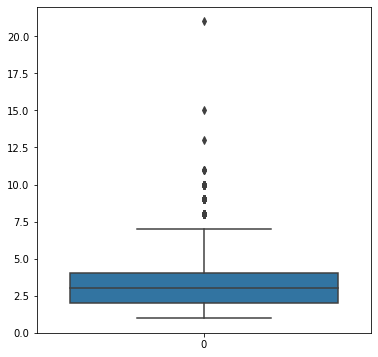

In [159]:
# Посмотрим на выбросы
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.xticks(rotation ='horizontal')
# plt.xlabel()
sns.boxplot(data=test_model['number_of_cuisines'])
# sns.boxplot(data=test_model['ranking'])
# sns.boxplot(data=test_model['rating'])
# sns.boxplot(data=test_model['reviews_num'])
# sns.boxplot(data=test_model['weekday'])
# sns.boxplot(data=test_model['km_from_center'])
# sns.boxplot(data=test_model['days_from_last_review'])
# sns.boxplot(data=test_model['semantic_negative'])
# sns.boxplot(data=test_model['semantic_neutral'])
# sns.boxplot(data=test_model['semantic_positive'])
plt.show()

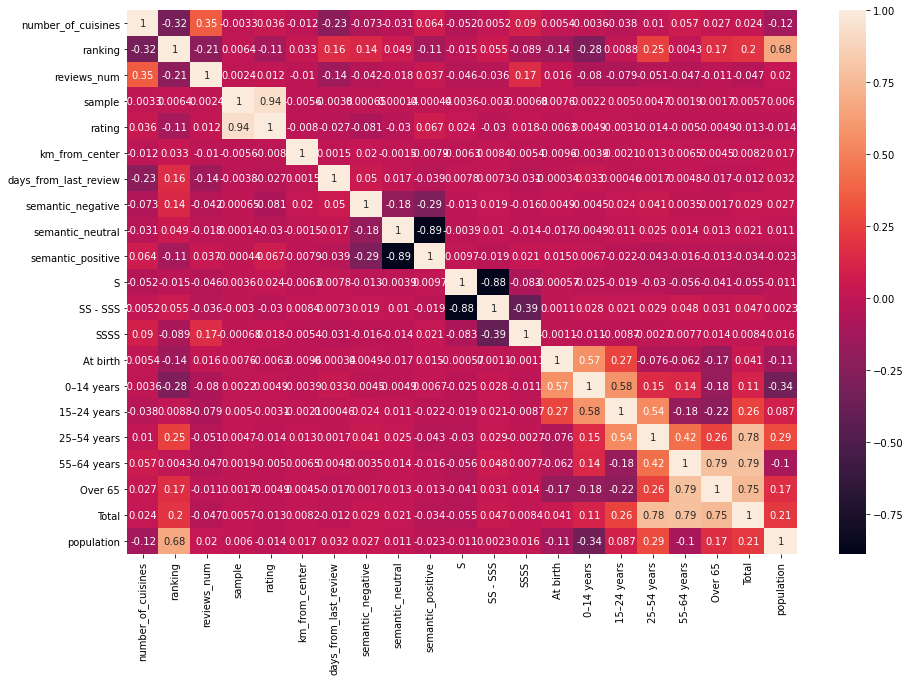

In [161]:
c = test_model[['number_of_cuisines','ranking','reviews_num',
                'sample','rating','km_from_center',
                'days_from_last_review','semantic_negative',
                'semantic_neutral','semantic_positive',
                'S','SS - SSS','SSSS','At birth','0–14 years',
                '15–24 years','25–54 years','55–64 years','Over 65',
                'Total','population']].corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(data=c, annot=True)
plt.show()

### Создадим новый датафрейм на основе test_model. Уберем параметры с высокой корреляцией

In [162]:
# Убедимся, что средняя цена представлена чаще, чем сильно коррелирующая с ней низкая
test_model[test_model['SS - SSS'] > 0]

,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_neutral,semantic_positive,...,SSSS,S,At birth,0–14 years,15–24 years,25–54 years,55–64 years,Over 65,Total,population
0,4,1219.0,22.0,0,0.0,12.356609,1190,0.000000,0.215000,0.785000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
1,8,1220.0,159.0,0,0.0,3.833179,1568,0.000000,0.236000,0.764000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
2,3,3146.0,53.0,0,0.0,5.195588,1677,0.000000,0.351000,0.649000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
3,4,3270.0,77.0,0,0.0,1.656895,1273,0.000000,0.328000,0.672000,...,0,0,1.07,1.06,1.07,1.04,0.96,0.75,0.98,6668865.0
4,9,1981.0,16.0,0,0.0,0.759719,2183,0.000000,0.580000,0.420000,...,0,0,1.06,1.06,1.06,1.02,0.91,0.67,0.94,1789620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,3,482.0,83.0,1,4.0,22.320000,1206,0.041245,0.575495,0.383260,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49959,3,477.0,83.0,1,4.0,23.149051,1206,0.041245,0.575495,0.383260,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49960,3,569.0,83.0,1,3.0,23.479518,1206,0.041245,0.575495,0.383260,...,0,0,1.06,1.06,1.05,1.05,1.05,0.82,1.02,613894.0
49961,4,374.0,88.0,1,4.0,0.806513,1190,0.037352,0.571084,0.391559,...,0,0,1.04,1.05,1.08,1.11,0.99,0.76,1.00,279631.0


In [163]:
test_model2 = test_model.drop(['S', 'Bar', 'Steakhouse', 
                               'Spanish', 'Chinese', 
                               'Thai', 'Gluten Free Options',
                               'Middle Eastern', 'African',
                               'Jamaican', 'Central American',
                               'Latin', 'Peruvian', 'South American',
                               'semantic_neutral','At birth','0–14 years','Total'], axis=1)
test_model2
# 'number_of_cuisines', 
# 'semantic_neutral'

,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_positive,European,...,Fujian,Salvadoran,Xinjiang,SS - SSS,SSSS,15–24 years,25–54 years,55–64 years,Over 65,population
0,4,1219.0,22.0,0,0.0,12.356609,1190,0.000000,0.785000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
1,8,1220.0,159.0,0,0.0,3.833179,1568,0.000000,0.764000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
2,3,3146.0,53.0,0,0.0,5.195588,1677,0.000000,0.649000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
3,4,3270.0,77.0,0,0.0,1.656895,1273,0.000000,0.672000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
4,9,1981.0,16.0,0,0.0,0.759719,2183,0.000000,0.420000,1,...,0,0,0,1,0,1.06,1.02,0.91,0.67,1789620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,3,482.0,83.0,1,4.0,22.320000,1206,0.041245,0.383260,1,...,0,0,0,1,0,1.05,1.05,1.05,0.82,613894.0
49959,3,477.0,83.0,1,4.0,23.149051,1206,0.041245,0.383260,1,...,0,0,0,1,0,1.05,1.05,1.05,0.82,613894.0
49960,3,569.0,83.0,1,3.0,23.479518,1206,0.041245,0.383260,1,...,0,0,0,1,0,1.05,1.05,1.05,0.82,613894.0
49961,4,374.0,88.0,1,4.0,0.806513,1190,0.037352,0.391559,1,...,0,0,0,1,0,1.08,1.11,0.99,0.76,279631.0


In [191]:
test_model2['sample'].unique()

array([0, 1], dtype=int64)

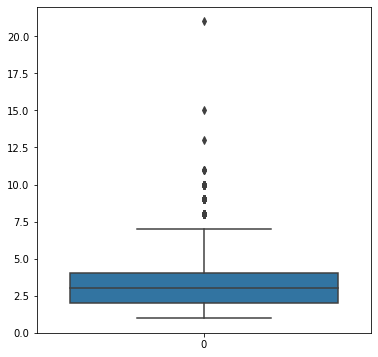

In [165]:
# Посмотрим на выбросы
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
# plt.xticks(rotation ='horizontal')
sns.boxplot(data=test_model2['number_of_cuisines'])
# sns.boxplot(data=test_model2['ranking'])
# sns.boxplot(data=test_model2['rating'])
# sns.boxplot(data=test_model2['reviews_num'])
# sns.boxplot(data=test_model2['weekday'])
# sns.boxplot(data=test_model2['km_from_center'])
# sns.boxplot(data=test_model2['days_from_last_review'])
# sns.boxplot(data=test_model2['semantic_negative'])
# sns.boxplot(data=test_model2['semantic_neutral'])
# sns.boxplot(data=test_model2['semantic_positive'])
plt.show()

<AxesSubplot:>

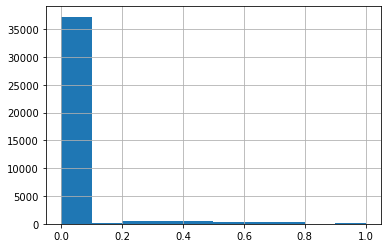

In [90]:
# test_model2['ranking'].hist()
# test_model2['rating'].hist()
# test_model2['reviews_num'].hist()
# test_model2['weekday'].hist()
# test_model2['km_from_center'].hist()
# test_model2['days_from_last_review'].hist()
test_model2['semantic_negative'].hist()
# test_model2['semantic_neutral'].hist()
# test_model2['semantic_positive'].hist()

In [192]:
test_model2.columns.values

array(['number_of_cuisines', 'ranking', 'reviews_num', 'sample', 'rating',
       'km_from_center', 'days_from_last_review', 'semantic_negative',
       'semantic_positive', 'European', 'Vegetarian Friendly', 'Dutch',
       'Vegan Options', 'Asian', 'Italian', 'Mediterranean',
       'International', 'Pub', 'Cafe', 'French', 'Pizza', 'American',
       'Fast Food', 'Seafood', 'Indonesian', 'Japanese', 'Grill',
       'Indian', 'Sushi', 'Barbecue', 'Central European', 'Turkish',
       'Healthy', 'Halal', 'Argentinean', 'Fusion', 'Mexican',
       'Delicatessen', 'Soups', 'Contemporary', 'Diner', 'Greek',
       'British', 'Vietnamese', 'Gastropub', 'Moroccan', 'Caribbean',
       'Nepali', 'Street Food', 'Lebanese', 'Portuguese', 'Wine Bar',
       'Brazilian', 'Irish', 'Korean', 'Swiss', 'Arabic', 'German',
       'Tibetan', 'Australian', 'Belgian', 'Brew Pub', 'Ethiopian',
       'Southwestern', 'Kosher', 'Malaysian', 'Minority Chinese',
       'New Zealand', 'Scandinavian', 'Singap

In [92]:
test_model2.semantic_negative.value_counts(bins=10)

(-0.002, 0.1]    37246
(0.3, 0.4]         501
(0.4, 0.5]         429
(0.2, 0.3]         423
(0.7, 0.8]         336
(0.5, 0.6]         327
(0.6, 0.7]         297
(0.9, 1.0]         213
(0.1, 0.2]         167
(0.8, 0.9]          41
Name: semantic_negative, dtype: int64

In [211]:
test_model2[test_model2['sample']==0]['rating'].value_counts(bins=4)

(-0.0005, 0.0]       10000
(0.0005, 0.001]          0
(0.0, 0.0005]            0
(-0.002, -0.0005]        0
Name: rating, dtype: int64

In [212]:
test_model2

,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_positive,European,...,Fujian,Salvadoran,Xinjiang,SS - SSS,SSSS,15–24 years,25–54 years,55–64 years,Over 65,population
0,4,1219.0,22.0,0,0.0,12.356609,1190,0.000000,0.785000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
1,8,1220.0,159.0,0,0.0,3.833179,1568,0.000000,0.764000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
2,3,3146.0,53.0,0,0.0,5.195588,1677,0.000000,0.649000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
3,4,3270.0,77.0,0,0.0,1.656895,1273,0.000000,0.672000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
4,9,1981.0,16.0,0,0.0,0.759719,2183,0.000000,0.420000,1,...,0,0,0,1,0,1.06,1.02,0.91,0.67,1789620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,3,482.0,83.0,1,4.0,22.320000,1206,0.041245,0.383260,1,...,0,0,0,1,0,1.05,1.05,1.05,0.82,613894.0
49959,3,477.0,83.0,1,4.0,23.149051,1206,0.041245,0.383260,1,...,0,0,0,1,0,1.05,1.05,1.05,0.82,613894.0
49960,3,569.0,83.0,1,3.0,23.479518,1206,0.041245,0.383260,1,...,0,0,0,1,0,1.05,1.05,1.05,0.82,613894.0
49961,4,374.0,88.0,1,4.0,0.806513,1190,0.037352,0.391559,1,...,0,0,0,1,0,1.08,1.11,0.99,0.76,279631.0


In [234]:
sample_zero = test_model2[test_model2['sample'] == 0]

test_model2_1 = test_model2[test_model2['sample'] == 1]
test_model2_1 = test_model2_1[~(test_model2.number_of_cuisines > 7)]
test_model2_1 = test_model2_1[~(test_model2.ranking > 6578.2)]
test_model2_1 = test_model2_1[~(test_model2.rating < 3)]
test_model2_1 = test_model2_1[~(test_model2.reviews_num > 1933.6)]
# test_model2_1 = test_model2_1.drop(['weekday'], axis=1)
test_model2_1 = test_model2_1[~(test_model2.km_from_center > 13.52)]
test_model2_1 = test_model2_1[~(test_model2.days_from_last_review > 1641.9)]
test_model2_1 = test_model2_1[~(test_model2.semantic_negative > 0.1)]
test_model2_1 = test_model2_1.append(sample_zero)
test_model2_1.reset_index(drop=True, inplace=True)
test_model2_1

<ipython-input-234-47d7404fcde4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_model2_1 = test_model2_1[~(test_model2.number_of_cuisines > 7)]
<ipython-input-234-47d7404fcde4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_model2_1 = test_model2_1[~(test_model2.ranking > 6578.2)]
<ipython-input-234-47d7404fcde4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_model2_1 = test_model2_1[~(test_model2.rating < 3)]
<ipython-input-234-47d7404fcde4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_model2_1 = test_model2_1[~(test_model2.reviews_num > 1933.6)]
<ipython-input-234-47d7404fcde4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_model2_1 = test_model2_1[~(test_model2.km_from_center > 13.52)]
<ipython-input-234-47d7404fcde4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame

,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_positive,European,...,Fujian,Salvadoran,Xinjiang,SS - SSS,SSSS,15–24 years,25–54 years,55–64 years,Over 65,population
0,3,5570.0,194.0,1,3.5,2.880693,1197,0.000000,0.420000,1,...,0,0,0,1,0,1.05,1.02,0.93,0.77,11078546.0
1,7,353.0,688.0,1,4.5,1.891143,1189,0.000000,0.508000,0,...,0,0,0,0,1,1.05,1.05,0.98,0.82,9425622.0
2,3,621.0,84.0,1,4.0,4.749366,1240,0.000000,0.457000,0,...,0,0,0,1,0,1.04,1.01,1.00,0.79,1553373.0
3,2,1722.0,50.0,1,4.0,4.734893,1253,0.000000,0.552000,0,...,0,0,0,0,0,1.01,0.97,0.94,0.76,3144473.0
4,3,4210.0,55.0,1,4.0,0.885822,1251,0.000000,0.846000,0,...,0,0,0,0,0,1.01,0.97,0.94,0.76,4278350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36072,3,2419.0,75.0,0,0.0,2.394324,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0
36073,3,2425.0,75.0,0,0.0,0.878745,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0
36074,3,2184.0,75.0,0,0.0,2.769000,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0
36075,3,1699.0,75.0,0,0.0,11.908765,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0


In [235]:
test_model2_1[test_model2_1['sample'] == 0]

,number_of_cuisines,ranking,reviews_num,sample,rating,km_from_center,days_from_last_review,semantic_negative,semantic_positive,European,...,Fujian,Salvadoran,Xinjiang,SS - SSS,SSSS,15–24 years,25–54 years,55–64 years,Over 65,population
26077,4,1219.0,22.0,0,0.0,12.356609,1190,0.000000,0.785000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
26078,8,1220.0,159.0,0,0.0,3.833179,1568,0.000000,0.764000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
26079,3,3146.0,53.0,0,0.0,5.195588,1677,0.000000,0.649000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
26080,4,3270.0,77.0,0,0.0,1.656895,1273,0.000000,0.672000,0,...,0,0,0,1,0,1.07,1.04,0.96,0.75,6668865.0
26081,9,1981.0,16.0,0,0.0,0.759719,2183,0.000000,0.420000,1,...,0,0,0,1,0,1.06,1.02,0.91,0.67,1789620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36072,3,2419.0,75.0,0,0.0,2.394324,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0
36073,3,2425.0,75.0,0,0.0,0.878745,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0
36074,3,2184.0,75.0,0,0.0,2.769000,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0
36075,3,1699.0,75.0,0,0.0,11.908765,1193,0.035341,0.397353,1,...,0,0,0,1,0,1.07,1.03,1.01,0.87,1656571.0


In [168]:
test_model2.columns.to_list()

['number_of_cuisines',
 'ranking',
 'reviews_num',
 'sample',
 'rating',
 'km_from_center',
 'days_from_last_review',
 'semantic_negative',
 'semantic_positive',
 'European',
 'Vegetarian Friendly',
 'Dutch',
 'Vegan Options',
 'Asian',
 'Italian',
 'Mediterranean',
 'International',
 'Pub',
 'Cafe',
 'French',
 'Pizza',
 'American',
 'Fast Food',
 'Seafood',
 'Indonesian',
 'Japanese',
 'Grill',
 'Indian',
 'Sushi',
 'Barbecue',
 'Central European',
 'Turkish',
 'Healthy',
 'Halal',
 'Argentinean',
 'Fusion',
 'Mexican',
 'Delicatessen',
 'Soups',
 'Contemporary',
 'Diner',
 'Greek',
 'British',
 'Vietnamese',
 'Gastropub',
 'Moroccan',
 'Caribbean',
 'Nepali',
 'Street Food',
 'Lebanese',
 'Portuguese',
 'Wine Bar',
 'Brazilian',
 'Irish',
 'Korean',
 'Swiss',
 'Arabic',
 'German',
 'Tibetan',
 'Australian',
 'Belgian',
 'Brew Pub',
 'Ethiopian',
 'Southwestern',
 'Kosher',
 'Malaysian',
 'Minority Chinese',
 'New Zealand',
 'Scandinavian',
 'Singaporean',
 'Afghani',
 'Cajun & Creol

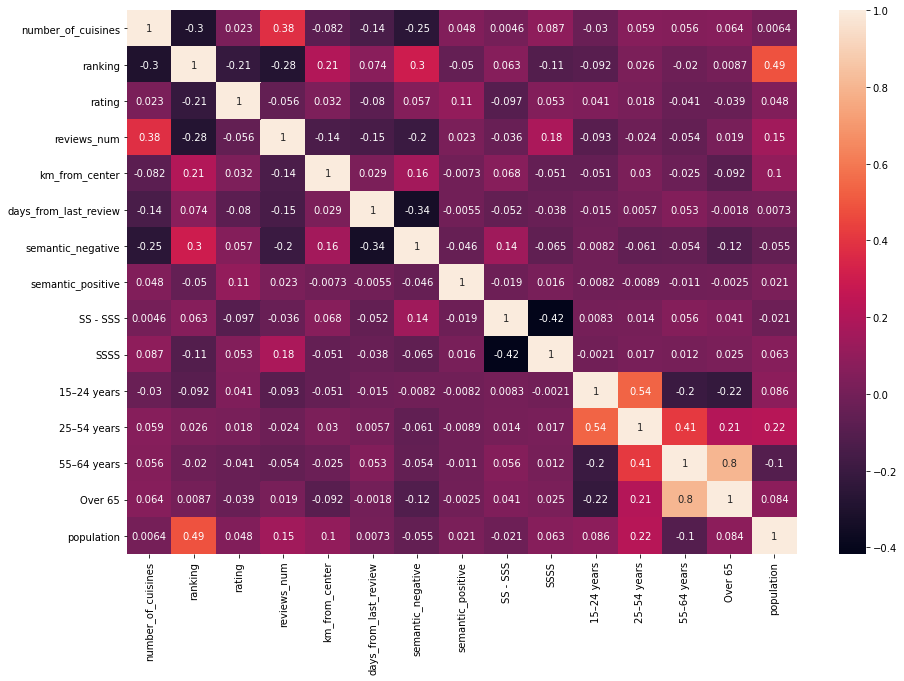

In [169]:
c = test_model2_1[['number_of_cuisines', 
 'ranking',
 'rating',
 'reviews_num',
 'km_from_center',
 'days_from_last_review',
 'semantic_negative',
 'semantic_positive',
 'SS - SSS', 
 'SSSS', '15–24 years',
 '25–54 years',
 '55–64 years',
 'Over 65',
 'population']].corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(data=c, annot=True, )
plt.show()

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [268]:
test_model2_1['sample'].unique()

array([1, 0], dtype=int64)

In [282]:
# Теперь выделим тестовую часть
train_data = test_model2_1[test_model2_1['sample'] == 1].drop(['sample'], axis=1)
test_data = test_model2_1[test_model2_1['sample'] == 0].drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [283]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [284]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 127), (26077, 127), (26077, 126), (20861, 126), (5216, 126))

# Model 
Сам ML

In [285]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [286]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [287]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [288]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20192005368098162


<AxesSubplot:>

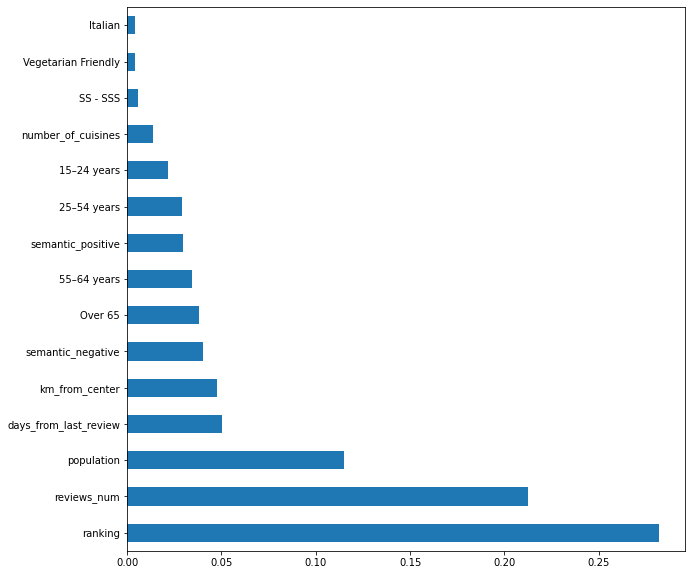

In [289]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [290]:
test_data.sample(10)

,number_of_cuisines,ranking,reviews_num,rating,km_from_center,days_from_last_review,semantic_negative,semantic_positive,European,Vegetarian Friendly,...,Fujian,Salvadoran,Xinjiang,SS - SSS,SSSS,15–24 years,25–54 years,55–64 years,Over 65,population
32402,5,36.0,696.0,0.0,0.854689,1196,0.038290,0.442135,1,0,...,0,0,0,0,0,1.05,1.02,1.00,0.85,1358608.0
34228,1,10424.0,13.0,0.0,4.301000,1190,0.040647,0.406073,0,0,...,0,0,0,1,0,1.05,1.02,0.93,0.77,11078546.0
33735,3,1220.0,10.0,0.0,2.159703,1231,0.046112,0.399246,1,0,...,0,0,0,1,0,1.07,1.06,0.96,0.72,1312199.0
33274,2,8508.0,17.0,0.0,1.529607,1252,0.040647,0.406073,1,0,...,0,0,0,1,0,1.05,1.02,0.93,0.77,11078546.0
28970,3,4380.0,26.0,0.0,11.152489,1270,0.051297,0.389441,0,1,...,0,0,0,0,0,1.05,1.05,0.98,0.82,9425622.0
27403,6,2039.0,627.0,0.0,6.551000,1196,0.051297,0.389441,1,1,...,0,0,0,1,0,1.05,1.05,0.98,0.82,9425622.0
26936,2,2558.0,31.0,0.0,0.927977,1379,0.025947,0.452665,0,0,...,0,0,0,0,0,1.01,0.97,0.94,0.76,4278350.0
34964,2,8519.0,3.0,0.0,3.262121,1190,0.040647,0.406073,1,0,...,0,0,0,1,0,1.05,1.02,0.93,0.77,11078546.0
27083,2,15254.0,14.0,0.0,7.658347,1253,0.051297,0.389441,0,0,...,0,0,0,0,0,1.05,1.05,0.98,0.82,9425622.0
27319,5,190.0,1611.0,0.0,0.909252,1194,0.046112,0.399246,1,0,...,0,0,0,0,0,1.07,1.06,0.96,0.72,1312199.0


In [291]:
test_data = test_data.drop(['rating'], axis=1)

In [292]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [293]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [294]:
predict_submission

array([4.62 , 4.145, 4.005, ..., 3.055, 4.03 , 3.01 ])

In [295]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,4.620
1,id_1,4.145
2,id_2,4.005
3,id_3,3.745
4,id_4,3.640
5,id_5,3.475
6,id_6,4.235
7,id_7,4.090
8,id_8,3.585
9,id_9,4.275


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
